In [130]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.interpolate as interp 
import scipy.optimize as opt
import pandas as pd

import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

In [113]:
years = np.array([1960, 1970, 1980, 1990, 2000, 2010, 2020, 2050])
pop = np.array([3.015470894, 3.694683794, 4.447606236, 5.327803110, 6.171702993, 7.021732148, 7.887001292, 9.664378587])
data={'Years':years, 'Population':pop}
df = pd.DataFrame(data)
df

,Years,Population
0,1960,3.015471
1,1970,3.694684
2,1980,4.447606
3,1990,5.327803
4,2000,6.171703
5,2010,7.021732
6,2020,7.887001
7,2050,9.664379


In [114]:
# number 1 i
def lininterp(y2, y1, x2, x1):
    return (y2-y1)/(x2-x1)

m = lininterp(6.171703, 4.447606, 2000, 1980)
b=4.447606-(m*1980)

lag = interp.lagrange([years[2], years[4]], [pop[2], pop[4]])

def popinterp(x, m=m, b=b):
    return (m*x)+b 

def est_and_error(x, err=False):
    y=popinterp(x)
    print(f'For {x}:')
    print(f'Interpolated value: {y:.3f}')
    if err:
            index = np.where(years==x)
            diff = np.abs(pop[index]-y)
            frac = (diff/pop[index])[0]
            print(f'Difference: {diff[0]:.3f}')
            print(f'Fractional error: {frac:.3%}')

def lagr(x, err=False):
    y=lag(x)
    print(f'For {x}, we get:')
    print(f'Interpolated value: {y:.3f}')
    if err:
            index = np.where(years==x)
            diff = np.abs(pop[index]-y)
            frac = (diff/pop[index])[0]
            print(f'Difference: {diff[0]:.3f}')
            print(f'Fractional error: {frac:.3%}')

est_and_error(1990, True)
print()
lagr(1990, True)

For 1990:
Interpolated value: 5.310
Difference: 0.018
Fractional error: 0.341%

For 1990, we get:
Interpolated value: 5.310
Difference: 0.018
Fractional error: 0.341%


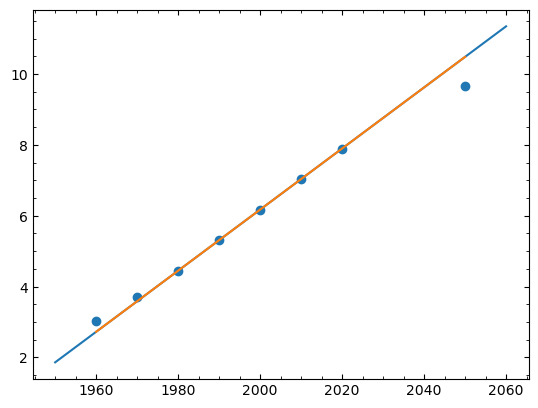

In [115]:
x=np.linspace(1950, 2060, 500)
y=popinterp(x)

plt.scatter(years, pop)
plt.plot(x,y)
plt.plot(years, lag(years))

In [116]:
# number 1 ii
est_and_error(1960, True)
print()
est_and_error(2020, True)
print()
print()
lagr(1960, True)
print()
lagr(2020, True)

For 1960:
Interpolated value: 2.724
Difference: 0.292
Fractional error: 9.682%

For 2020:
Interpolated value: 7.896
Difference: 0.009
Fractional error: 0.112%


For 1960, we get:
Interpolated value: 2.724
Difference: 0.292
Fractional error: 9.682%

For 2020, we get:
Interpolated value: 7.896
Difference: 0.009
Fractional error: 0.112%


In [117]:
# number 1 iii
est_and_error(2050)
print()
est_and_error(2100)
print()
print()
lagr(2050)
print()
lagr(2100)

For 2050:
Interpolated value: 10.482

For 2100:
Interpolated value: 14.792


For 2050, we get:
Interpolated value: 10.482

For 2100, we get:
Interpolated value: 14.792


For 1990, we get:
Interpolated value: 5.273
Difference: 0.055
Fractional error: 1.023%

For 1960, we get:
Interpolated value: 3.015
Difference: 0.001
Fractional error: 0.032%

For 2020, we get:
Interpolated value: 8.187
Difference: 0.300
Fractional error: 3.801%

For 2050, we get:
Interpolated value: 11.755

For 2100, we get:
Interpolated value: 19.157


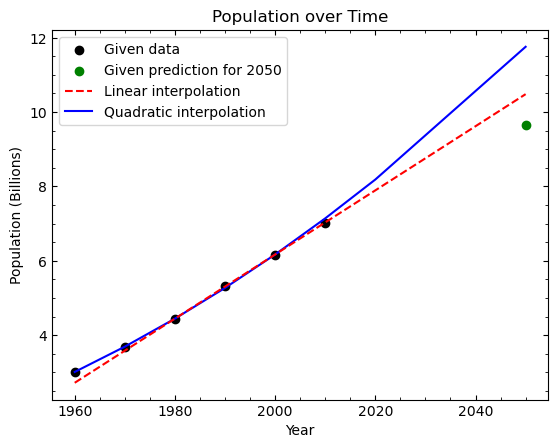

In [118]:
# number 1 iv
lag3 = interp.lagrange([years[1], years[2], years[4]], [pop[1], pop[2], pop[4]])

def lagr3(x, err=False):
    y=lag3(x)
    print(f'For {x}, we get:')
    print(f'Interpolated value: {y:.3f}')
    if err:
            index = np.where(years==x)
            diff = np.abs(pop[index]-y)
            frac = (diff/pop[index])[0]
            print(f'Difference: {diff[0]:.3f}')
            print(f'Fractional error: {frac:.3%}')

lagr3(1990, True)
print()
lagr3(1960, True)
print()
lagr3(2020, True)
print()
lagr3(2050)
print()
lagr3(2100)

plt.scatter(years[0:len(years)-2], pop[0:len(years)-2], c='k', label="Given data")
plt.scatter(years[-1], pop[-1], c='g', label='Given prediction for 2050')
plt.plot(years, lag(years), c='r', ls='--', zorder=5, label='Linear interpolation')
plt.plot(years, lag3(years), c='b', ls='-', label='Quadratic interpolation')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')
plt.title("Population over Time")
plt.legend()

In [119]:
# number 2
time = np.array([1,2,3,4,7,8,9])
dist = np.array([-3.4083885, -5.6100975, -5.8256509, -3.9787359, 5.3127362, 5.9562532, 4.4910645])

data={"Time": time, "Distance":dist}
df = pd.DataFrame(data)
df

,Time,Distance
0,1,-3.408389
1,2,-5.610098
2,3,-5.825651
3,4,-3.978736
4,7,5.312736
5,8,5.956253
6,9,4.491065


For day 5:
Interpolated distance = -0.746379267085954
For day 6:
Interpolated distance = 2.7481332628406694


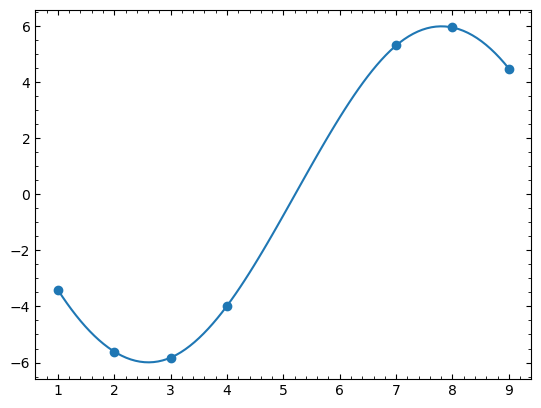

In [120]:
# 2 i
spline = interp.make_interp_spline(time, dist)
grid = np.linspace(1,9,100)

print(f"For day 5:\nInterpolated distance = {spline(5)}")
print(f"For day 6:\nInterpolated distance = {spline(6)}")

plt.scatter(time, dist)
plt.plot(grid, spline(grid))

In [126]:
# 2 ii
low = np.abs(spline(5)-spline(6))
high = np.abs(spline(4)-spline(7))
print(low, high)
print(np.abs(dist[3]-dist[4]))

3.4945125299266233 9.2914721
9.2914721


2.606386793293468 7.804243347962625


5.1978565546691575

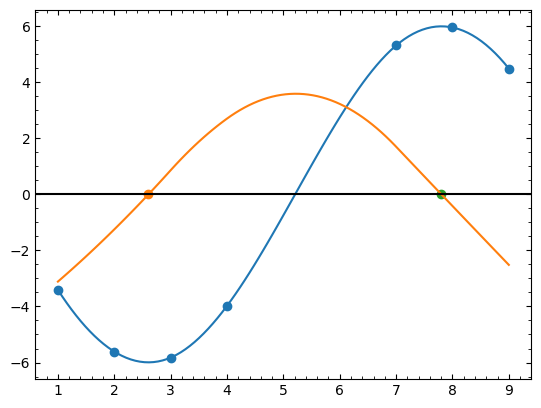

In [137]:
# 2 iii
plt.scatter(time, dist)
plt.plot(grid, spline(grid))
plt.plot(grid, deriv)
plt.axhline(0, c='k')

r=opt.brentq(spline, 2, 3, args=(1))
r2=opt.brentq(spline, 7, 8, args=(1))

plt.scatter(r, 0)
plt.scatter(r2, 0)

print(r, r2)
r2-r